In [6]:
!pip install nb_black lightgbm pyarrow umap-learn BorutaShap

In [1]:
%load_ext lab_black
%reload_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import os
import glob
import tqdm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
import umap
import lightgbm as lgb
import numpy as np

from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.impute import KNNImputer, SimpleImputer

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

from utils import DATA_SETS, gather_df, prepare_df

water_spring_amiata
target_flow_rate_bugnano


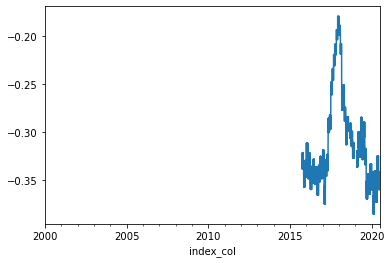

target_flow_rate_arbure


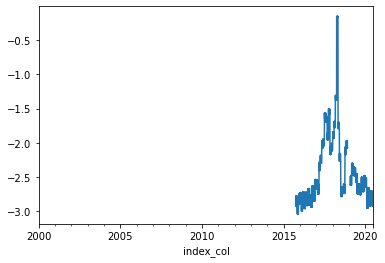

target_flow_rate_ermicciolo


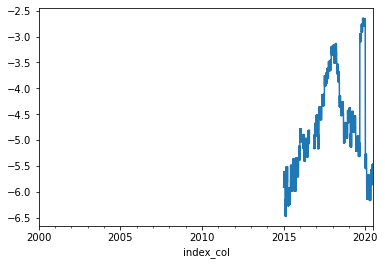

target_flow_rate_galleria_alta


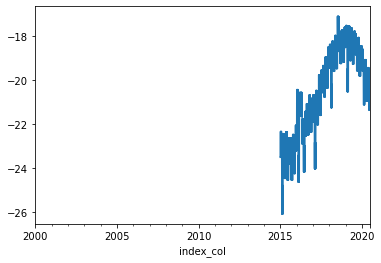

In [77]:
for dataset in DATA_SETS[1:2]:
    print(dataset)
    df = gather_df(dataset, True, False, False, True)
    for target_col in [c for c in df.columns if "target" in c]:
        print(target_col)
        df[target_col].plot()
        plt.show()

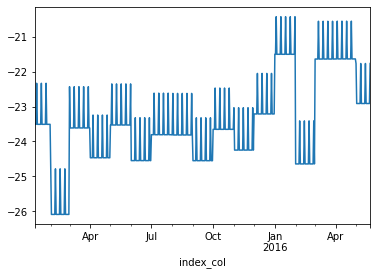

In [78]:
# kan zo'n variabele?
df[[c for c in df.columns if "target" in c][3]].iloc[-2000:-1500].plot()

In [130]:
for d in ["water_spring_madonna_di_canneto"]:
    print(d)
    df = gather_df(d, True, True, True, True)
    print(df.shape)

water_spring_madonna_di_canneto
(3104, 315)


In [134]:
df[[c for c in df.columns if "missing" in c]]

,missing_col_0,missing_col_1,missing_col_2,missing_col_3,missing_col_4,missing_col_5,missing_col_6,missing_col_7,missing_col_8,missing_col_9,...,missing_col_137,missing_col_138,missing_col_139,missing_col_140,missing_col_141,missing_col_142,missing_col_143,missing_col_144,missing_col_145,missing_col_146
index_col,,,,,,,,,,,,,,,,,,,,,
2012-01-01,True,False,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2012-01-02,True,False,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2012-01-03,True,False,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2012-01-04,True,False,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2012-01-05,True,False,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-26,False,True,True,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
2020-06-27,False,True,True,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
2020-06-28,False,True,True,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True


In [45]:
pd.read_json("./simres.json").iloc[:817]["mae_orig"].describe()

count    695.000000
mean       0.912668
std        1.566777
min        0.013838
25%        0.225891
50%        0.444863
75%        0.870368
max       15.702755
Name: mae_orig, dtype: float64

In [48]:
pd.read_json("./simres.json").target_col.nunique()

20

In [44]:
pd.read_json("./simres-umap.json")["mae_orig"].describe()

count    817.000000
mean       0.991020
std        1.611719
min        0.013671
25%        0.243447
50%        0.476991
75%        0.957298
max       15.702755
Name: mae_orig, dtype: float64

In [182]:
pd.read_json("./simres-400-ahead.json").groupby(
    ["dataset", "target_col", "shift"]
).mean()

split  \
dataset             target_col                                 shift          
aquifer_auser       target_depth_to_groundwater_cos            30      6000   
                                                               60      6000   
                    target_depth_to_groundwater_lt2            30      6000   
                                                               60      6000   
                    target_depth_to_groundwater_sal            30      6200   
                                                               60      6200   
aquifer_doganella   target_depth_to_groundwater_pozzo_1        30      5000   
                                                               60      5000   
                    target_depth_to_groundwater_pozzo_2        30      5000   
                                                               60      5000   
                    target_depth_to_groundwater_pozzo_3        30      5000   
                                                               60      5000   
                    target_depth_to_groundwater_pozzo_4        30      5000   
                                                               60      5000   
                    target_depth_to_groundwater_pozzo_5        30      5000   
                                                               60      5000   
                    target_depth_to_groundwater_pozzo_6        30      5000   
                                                               60      5000   
                    target_depth_to_groundwater_pozzo_7        30      5000   
                                                               60      5000   
                    target_depth_to_groundwater_pozzo_8        30      5000   
                                                               60      5000   
                    target_depth_to_groundwater_pozzo_9        30      5000   
                                                               60      5000   
aquifer_luco        target_depth_to_groundwater_podere_casetta 30      5000   
aquifer_petrignano  target_depth_to_groundwater_p24            30      3800   
                                                               60      3800   
                    target_depth_to_groundwater_p25            30      3800   
                                                               60      3800   
water_spring_amiata target_flow_rate_ermicciolo                30      7000   
                                                               60      7000   
                    target_flow_rate_galleria_alta             30      7000   
                                                               60      7000   

                                                                           mae  \
dataset             target_col                                 shift             
aquifer_auser       target_depth_to_groundwater_cos            30     0.076661   
                                                               60     0.107291   
                    target_depth_to_groundwater_lt2            30     0.009918   
                                                               60     0.016644   
                    target_depth_to_groundwater_sal            30     0.061806   
                                                               60     0.075539   
aquifer_doganella   target_depth_to_groundwater_pozzo_1        30     0.107274   
                                                               60     0.156904   
                    target_depth_to_groundwater_pozzo_2        30     0.004780   
                                                               60     0.006683   
                    target_depth_to_groundwater_pozzo_3        30     0.016729   
                                                               60     0.022696   
                    target_depth_to_groundwater_pozzo_4        30     0.010269   
                                                               60     0.01

In [2]:
df = gather_df(DATA_SETS[0], True)
df = prepare_df(df, True, False, True)

# for category in [
#     "_ts",
#     "ws10m",
#     "ws10m_min",
#     "ws10m_max",
#     "ws50m",
#     "ws50m_max",
#     "ws50m_min",
#     "prectot",
#     "_ps",
#     "qv2m",
#     "rh2m",
#     "t2m",
#     "t2mwet",
#     "t2m_max",
#     "t2m_min",
# ]:
#     cols = [c for c in df.columns if c.endswith(category)]
#     new_col = df[cols].mean(axis=1).copy()
#     df = df.drop(cols, axis=1)
#     df[category] = new_col
# for category in ["rainfall", "temperature"]:
#     cols = [c for c in df.columns if c.startswith(category)]
#     new_col = df[cols].mean(axis=1)
#     df = df.drop(cols, axis=1)
#     df[category] = new_col

In [10]:
[c for c in df.columns if "target" in c]

['target_depth_to_groundwater_lt2',
 'target_depth_to_groundwater_sal',
 'target_depth_to_groundwater_cos']

In [22]:
category = "prectot"

In [23]:
um = umap.UMAP()
ts_component = um.fit_transform(
    df[[c for c in df.columns if c.endswith(category)]].bfill()
)

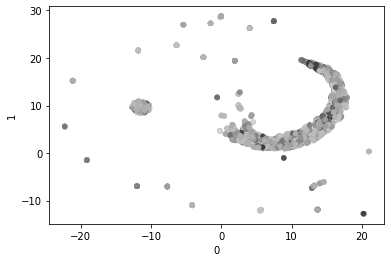

In [24]:
pd.DataFrame(ts_component).plot.scatter(0, 1, c=df.target_depth_to_groundwater_sal)

In [25]:
means = df[[c for c in df.columns if c.endswith(category)]].mean(axis=1)
target = df.target_depth_to_groundwater_lt2
# pd.DataFrame().plot(
#     c=target
# )

In [26]:
means

index_col
1998-03-05         NaN
1998-03-06         NaN
1998-03-07         NaN
1998-03-08         NaN
1998-03-09         NaN
                ...   
2020-06-26    0.175833
2020-06-27    0.000000
2020-06-28    0.000000
2020-06-29    0.065833
2020-06-30    0.218333
Length: 8154, dtype: float64

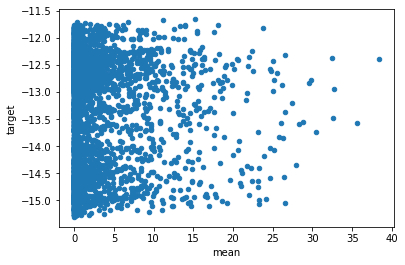

In [27]:
pd.DataFrame({"mean": means, "target": target}).plot.scatter("mean", "target")